# Disease Prediction Using SVC, Gaussian Naive Bayes & Random forest classifer

**Importing the needed libraries needed for this project**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score

## Reading the data 

In [3]:
df=pd.read_csv("Training.csv")

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


## Creating a bar plot to visualize the count of each of the diffrent disease present in the Dataset

**We can see that the dataset is balanced ie) each disease has the same count**

<function matplotlib.pyplot.show(close=None, block=None)>

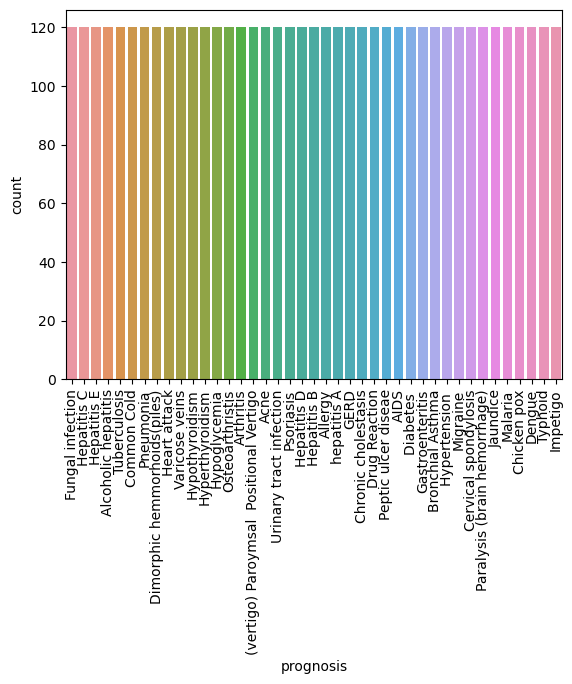

<Figure size 1800x1800 with 0 Axes>

In [6]:
a=df['prognosis'].value_counts()
b=df['prognosis'].value_counts().index
sns.barplot(x=b,y=a,data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(18,18))
plt.show

## Enumerating the prognosis column of the dataset 
**Enumerating the prognosis into a range from 0-40 and visualizing it again**

In [7]:
encoder=LabelEncoder()
df['prognosis']=encoder.fit_transform(df['prognosis'])

<function matplotlib.pyplot.show(close=None, block=None)>

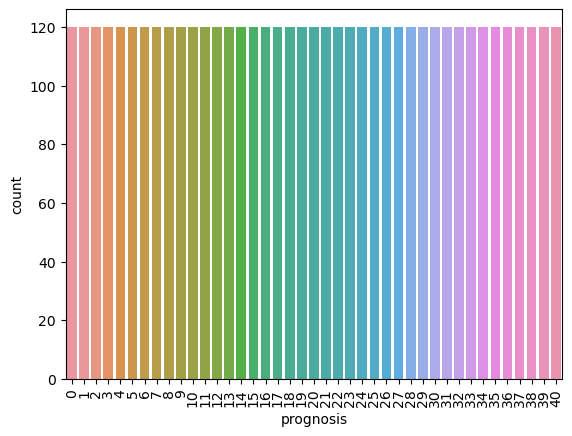

<Figure size 1800x800 with 0 Axes>

In [8]:
a=df['prognosis'].value_counts()
b=df['prognosis'].value_counts().index
sns.barplot(x=b,y=a,data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(18,8))
plt.show

In [9]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,35,NaN


## Droping a redundant column from the dataset

In [10]:
df.drop('Unnamed: 133', axis=1,inplace=True)

In [11]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


## Spliting the dataset into the input and ouput 
**x is the input and y is the output**

In [12]:
x=df.iloc[:,:-1]

In [13]:
y=df.iloc[:,-1]

In [14]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

## Train-test split
**Spliting the data into the training and testing data with the test data being 20% of the total data**

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f"Test: {x_test.shape},{y_test.shape}")
print(f"Train:{x_train.shape},{y_train.shape}")

Test: (984, 132),(984,)
Train:(3936, 132),(3936,)


## Creating a SVC model on the traing data

In [17]:
model=SVC()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

## Creating a Gaussian NB model on the traing data

In [18]:
model2=GaussianNB()
model2.fit(x_train,y_train)
predictionsGaussianNB=model2.predict(x_test)

## Creating a Random Forest model on the traing data

In [19]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
predictionsRandomForest=model3.predict(x_test)

## Evaluating the SVC model 
**By calculating performance metrics like accuracy, precision, recall and F1 score**

Accuracy by SVM Classifier: 100.0
Precision score by SVM Classifier: 100.0
Recall score by SVM Classifier:100.0
F1 score by SVM Classifier : 100.0


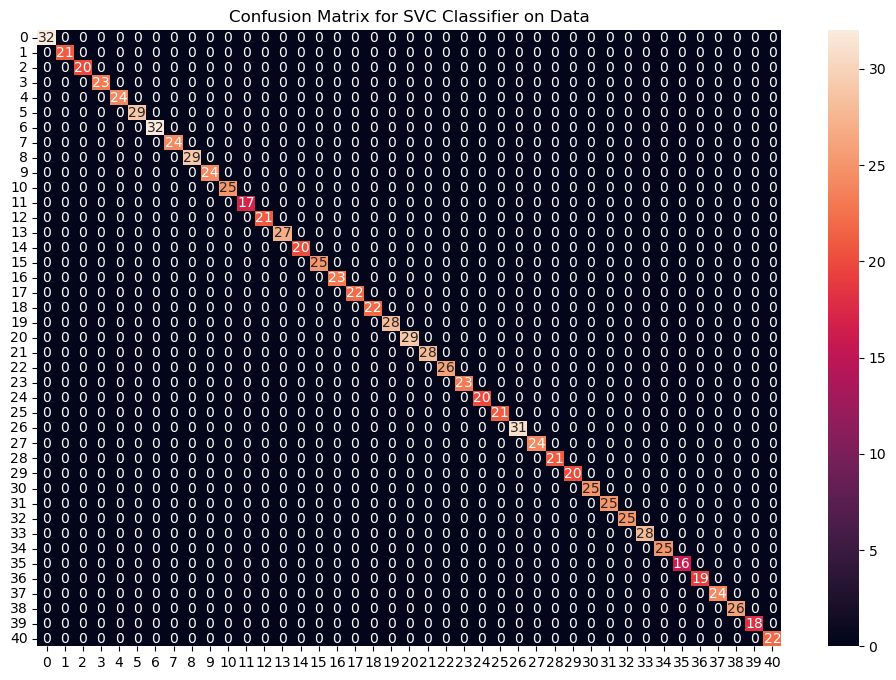

In [20]:
precision=precision_score(y_test,predictions, average="weighted")*100
recall=recall_score(y_test,predictions, average="weighted")*100
f1=f1_score(y_test,predictions, average="weighted")*100


print(f"Accuracy by SVM Classifier\
: {accuracy_score(y_test, predictions)*100}")
print(f"Precision score by SVM Classifier: {precision}")
print(f"Recall score by SVM Classifier:{recall}")
print(f"F1 score by SVM Classifier : {f1}")


cf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVC Classifier on Data")
plt.show()

## Evaluating the GaussianNB model 
**By calculating performance metrics like accuracy, precision, recall and F1 score**

Accuracy by GaussianNB: 100.0
Precision score by GaussianNB: 100.0
Recall score by GaussianNB:100.0
F1 score by GaussianNB : 100.0


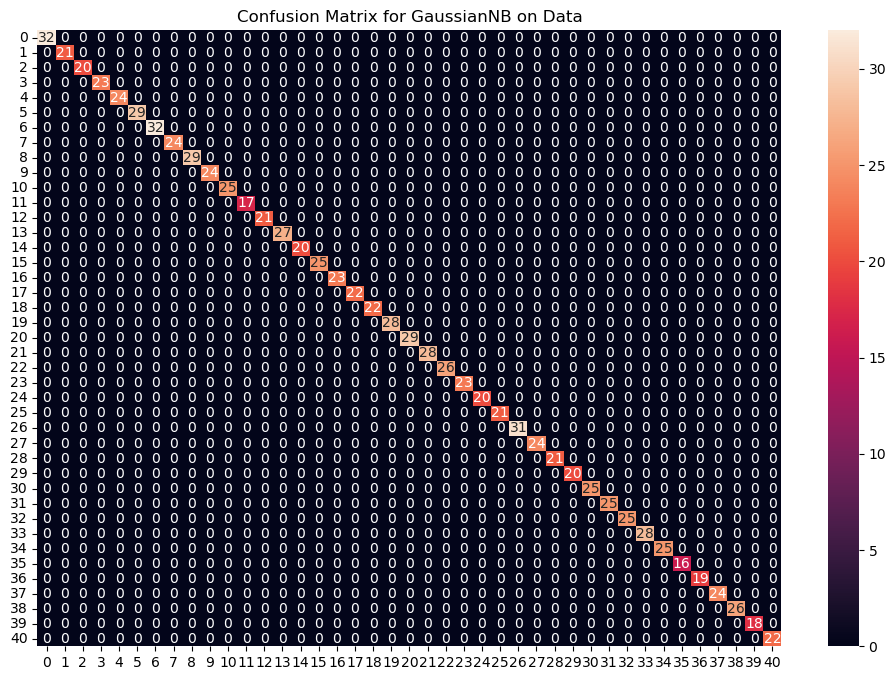

In [21]:
precision=precision_score(y_test,predictionsGaussianNB, average="weighted")*100
recall=recall_score(y_test,predictionsGaussianNB, average="weighted")*100
f1=f1_score(y_test,predictionsGaussianNB, average="weighted")*100


print(f"Accuracy by GaussianNB\
: {accuracy_score(y_test, predictionsGaussianNB)*100}")
print(f"Precision score by GaussianNB: {precision}")
print(f"Recall score by GaussianNB:{recall}")
print(f"F1 score by GaussianNB : {f1}")


cf_matrix = confusion_matrix(y_test, predictionsGaussianNB)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GaussianNB on Data")
plt.show()

## Evaluating the Random Forest model 
**By calculating performance metrics like accuracy, precision, recall and F1 score**

Accuracy by Random Forest: 100.0
Precision score by Random Forest: 100.0
Recall score by Random Forest:100.0
F1 score by Random Forest : 100.0


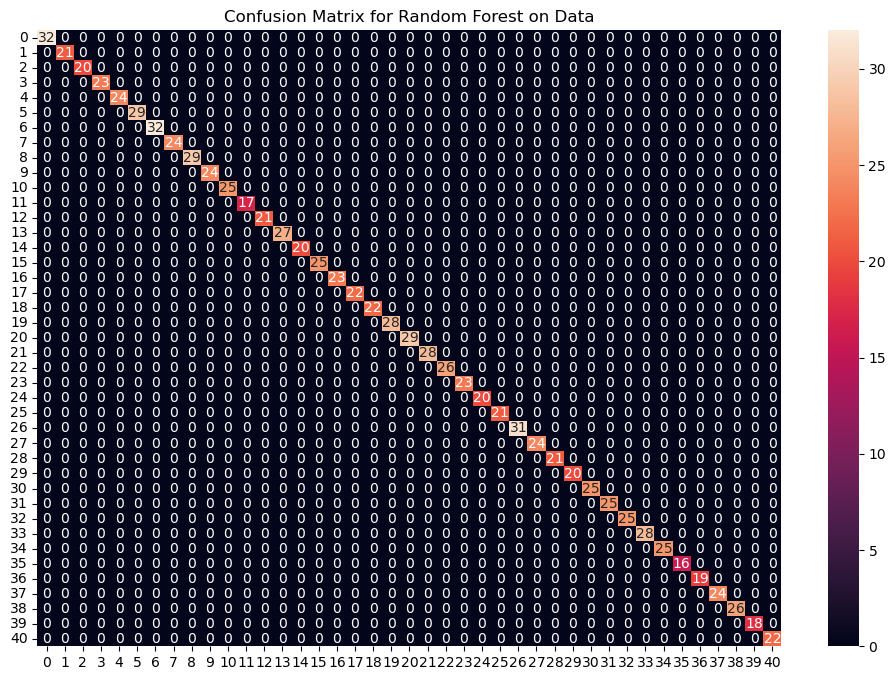

In [22]:
precision=precision_score(y_test,predictionsRandomForest, average="weighted")*100
recall=recall_score(y_test,predictionsRandomForest, average="weighted")*100
f1=f1_score(y_test,predictionsRandomForest, average="weighted")*100


print(f"Accuracy by Random Forest\
: {accuracy_score(y_test, predictionsRandomForest)*100}")
print(f"Precision score by Random Forest: {precision}")
print(f"Recall score by Random Forest:{recall}")
print(f"F1 score by Random Forest : {f1}")


cf_matrix = confusion_matrix(y_test, predictionsRandomForest)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest on Data")
plt.show()

## Creating suitable data structures and function to take user input and process it appropriately make successful predictions

In [23]:
symptoms=x.columns.values
symptomIndex={}
for index, value in enumerate(symptoms):
    symptom=" ".join([i.capitalize() for i in value.split("_")])
    symptomIndex[symptom]=index

dataDict={
    "symptomIndex":symptomIndex,
    "predictions_classes":encoder.classes_
}

def PredictDisease(symptoms):
    symptoms=symptoms.split(",")
    input_data=[0]*len(dataDict["symptomIndex"])
    for symptom in symptoms:
        index = dataDict["symptomIndex"][symptom]
        input_data[index]=1

    input_data=np.array(input_data).reshape(1,-1)

    prediction1=dataDict["predictions_classes"][model.predict(input_data)[0]]
    prediction2=dataDict["predictions_classes"][model2.predict(input_data)[0]]
    prediction3=dataDict["predictions_classes"][model3.predict(input_data)[0]]

    result={
        "SVM Prediction": prediction1,
        "GaussianNB Prediction": prediction2,
        "Random Forest Prediction": prediction3
    }
    return result

#
print(PredictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))





{'SVM Prediction': 'Fungal infection', 'GaussianNB Prediction': 'Fungal infection', 'Random Forest Prediction': 'Fungal infection'}


c:\Users\mustu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\mustu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\mustu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
